In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from os import listdir
%matplotlib inline

In [204]:
def get_results(fname):    
    ds = pd.read_csv(fname)
    return {
        'epoch': ds['epoch'].to_numpy(),
        'acc': ds['acc'].to_numpy(),
        'loss': ds['loss'].to_numpy(),
        'val_acc': ds['val_acc'].to_numpy(),
        'val_loss': ds['val_loss'].to_numpy()
    }

def get_runs_data(f, run_names):
    f = Path(f)
    info = {}
    for run_key in run_names.keys():
        print(run_key)
        info[run_key] = get_results(f / run_names[run_key] / 'logger.csv')
        info[run_key]['name'] = run_key        
    return info

def add_results(ax, x, y, y_val, color, label, max_epoch=None):
    if max_epoch:
        x = x[:max_epoch]
        y = y[:max_epoch]
        y_val = y_val[:max_epoch]
    ax.plot(x, y, color=color, label=label)
    ax.plot(x, y_val, '--', color=color)
    

def plot(info, runs_to_plot, colors, max_epoch=None):
    fig = plt.figure(figsize=(20,10))
    
    ax = fig.add_subplot(1, 2, 1)
    #ax.set_title('Accuracy')
    ax.set_ylim((0.4, 1))
    ax.set_xlabel('epoch')
    ax.set_ylabel('Accuracy')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for idx, run in enumerate(runs_to_plot):
        add_results(ax, info[run]['epoch'], info[run]['acc'], info[run]['val_acc'], colors[idx], 
                    info[run]['name'], max_epoch=max_epoch)
    ax.legend()
    
    ax = fig.add_subplot(1, 2, 2)
    #ax.set_title('Loss')
    ax.set_xlabel('epoch')
    ax.set_ylabel('Loss')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for idx, run in enumerate(runs_to_plot):
        add_results(ax, info[run]['epoch'], info[run]['loss'], info[run]['val_loss'], colors[idx],
                    info[run]['name'], max_epoch=max_epoch)
    ax.legend()

In [53]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts')

In [15]:
# 'yu_resnet50': 'resnet50_lr2e4_b5_3_20191119_193554',
#     'yu_vgg16': 'vgg16_lr2e5_b5_20191119_194209',    
#     'vgg16_2': 'vgg16_lr5e3_b5_20191119_203743',
#     'yu_cnn6': 'yu_cnn6_20191119_211333',
#     'cnn6_lr2e2': 'yu_cnn6_20191119_212923',
        
run_names = {
    'r50_c5b3': 'run_1',
    'r50_c5b2': 'run_2',
    'r50_c5b1': 'run_3',
    'r50_c4b6': 'run_4',
    'r50_c4b5': 'run_5',
    'r50_c4b4': 'run_6',
    'r50_c4b3': 'run_7',
    'r50_c4b2': 'run_8',
    'r50_c4b1': 'run_9',
    'r50_c3b4': 'run_10',
    'r50_c3b3': 'run_11',
    'r50_c5b3-': 'run_12',
    'r50_c5b2-': 'run_13',
    'r50_c5b1-': 'run_14',
    'r50_c4b6-': 'run_15',
    'r50_c4b5-': 'run_16',
    'r50_c4b4-': 'run_17',
    'r50_c4b3-': 'run_18',
    'r50_c4b2-': 'run_19',
    'r50_c4b1-': 'run_20',
    'r50_c3b4-': 'run_21',
    'r50_c3b3-': 'run_22',
    'rep1_cnn6': 'rep1',
    'rep2_vgg16': 'rep2',
    'rep3_resnet50': 'rep3',
    'rep1_cnn6_lr1e_2': 'rep1b',
    'rep2_vgg16_lr1e_3': 'rep2b'
}

info = get_runs_data(ARTIFACTS_PATH, run_names)

r50_c5b3
r50_c5b2
r50_c5b1
r50_c4b6
r50_c4b5
r50_c4b4
r50_c4b3
r50_c4b2
r50_c4b1
r50_c3b4
r50_c3b3
r50_c5b3-
r50_c5b2-
r50_c5b1-
r50_c4b6-
r50_c4b5-
r50_c4b4-
r50_c4b3-
r50_c4b2-
r50_c4b1-
r50_c3b4-
r50_c3b3-
rep1_cnn6
rep2_vgg16
rep3_resnet50
rep1_cnn6_lr1e_2
rep2_vgg16_lr1e_3


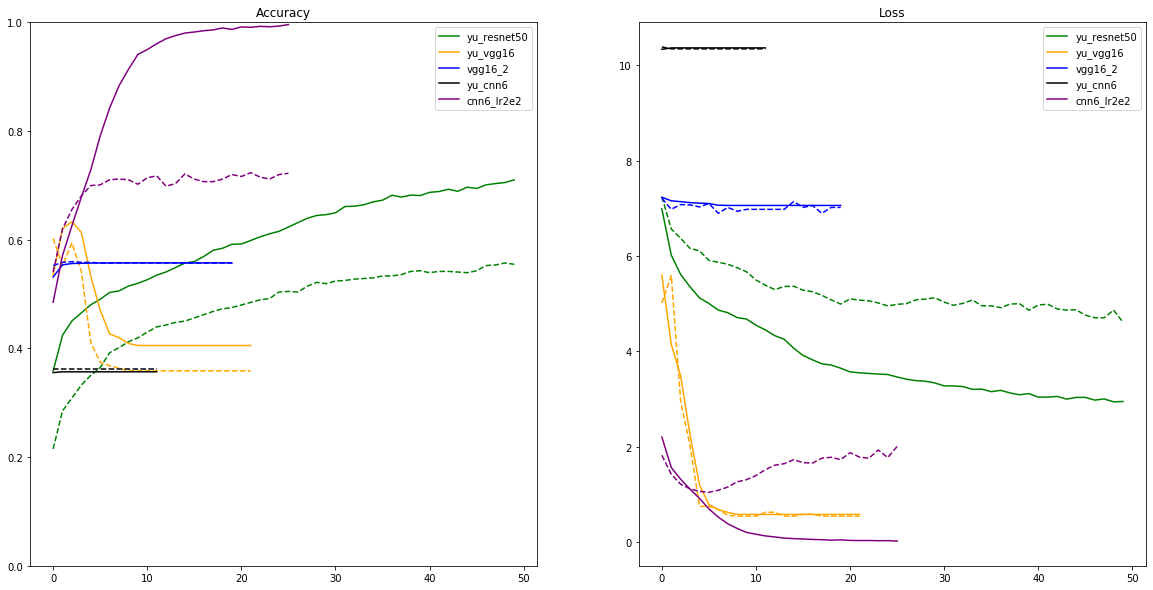

In [54]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['yu_resnet50', 'yu_vgg16', 'vgg16_2', 'yu_cnn6', 'cnn6_lr2e2']
plot(info, runs_to_plot, colors, max_epoch=None)

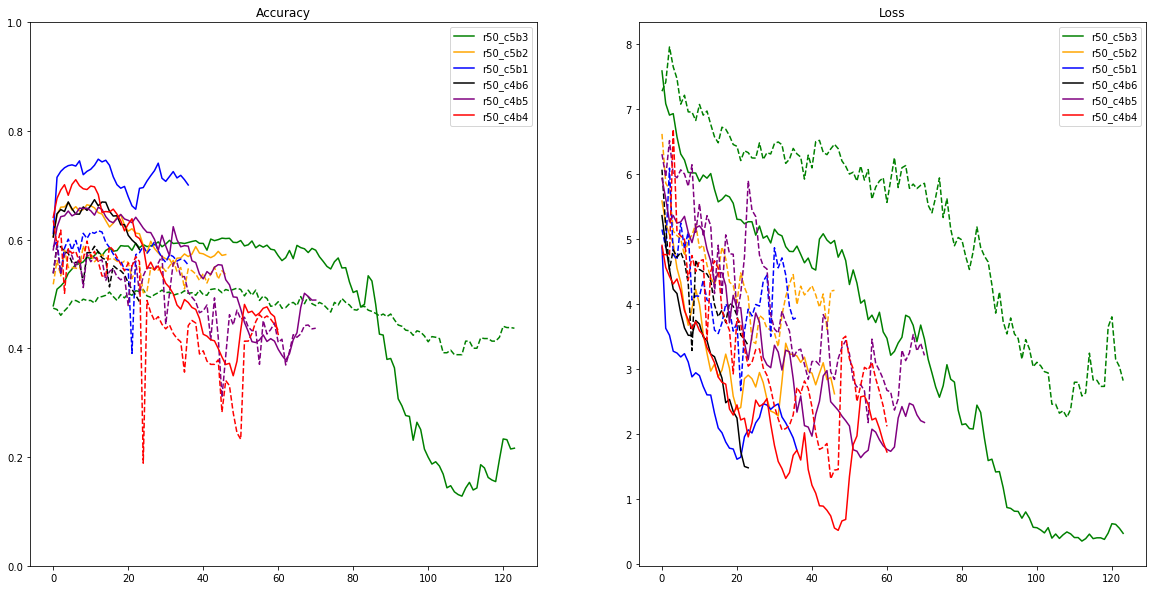

In [9]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['r50_c5b3', 'r50_c5b2', 'r50_c5b1', 'r50_c4b6', 'r50_c4b5', 'r50_c4b4']
plot(info, runs_to_plot, colors, max_epoch=None)

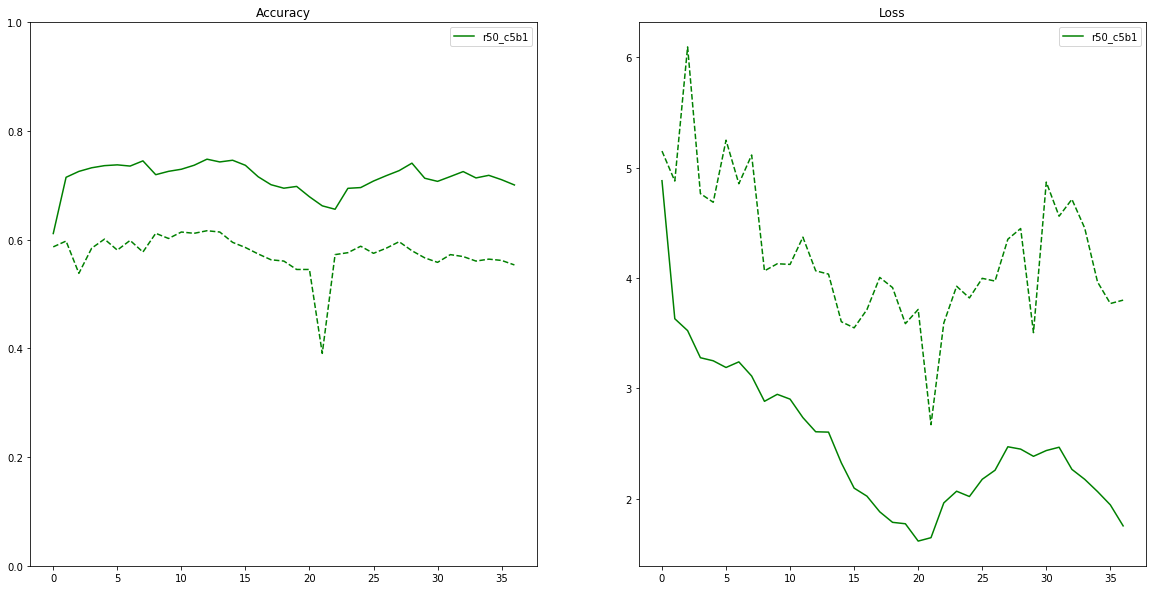

In [10]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['r50_c5b1']
plot(info, runs_to_plot, colors, max_epoch=None)

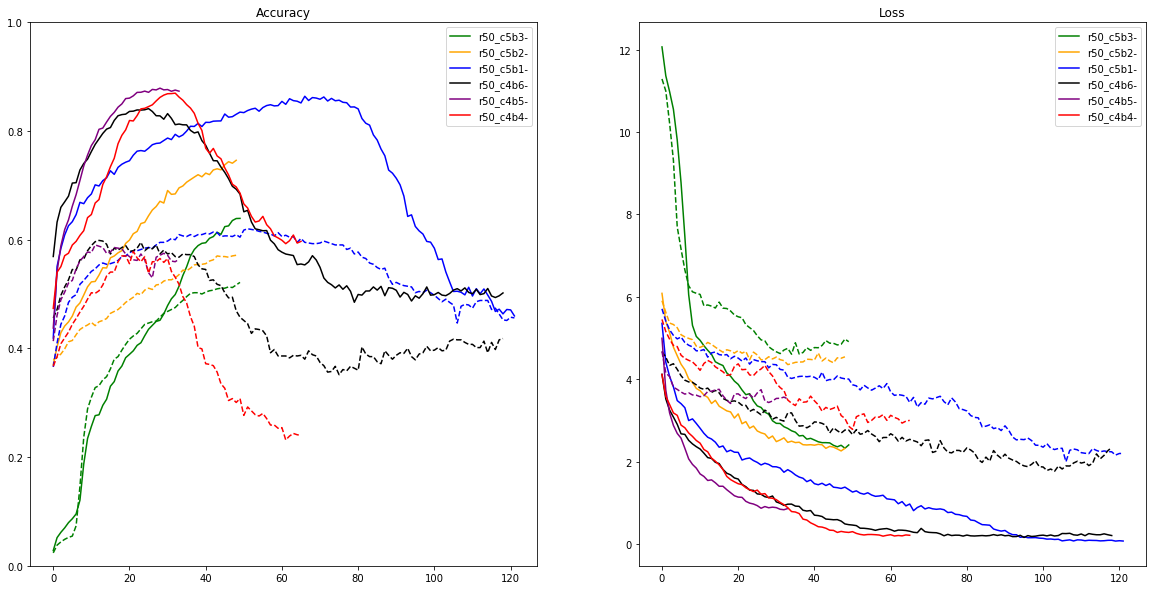

In [5]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['r50_c5b3-', 'r50_c5b2-', 'r50_c5b1-', 'r50_c4b6-', 'r50_c4b5-', 'r50_c4b4-']
plot(info, runs_to_plot, colors, max_epoch=None)

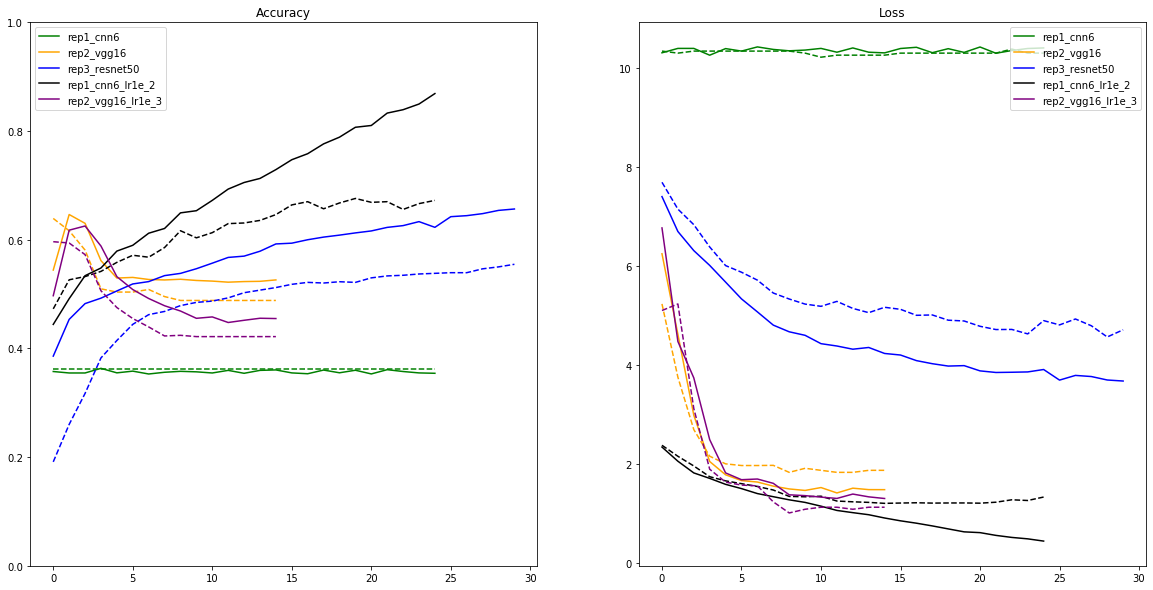

In [16]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['rep1_cnn6', 'rep2_vgg16', 'rep3_resnet50', 'rep1_cnn6_lr1e_2', 'rep2_vgg16_lr1e_3']
plot(info, runs_to_plot, colors, max_epoch=None)

In [4]:
runs_output_c5b3 = {
    'c5b1': 'micro_resnet_c5b1_20200120_035243',
    'c4b6': 'micro_resnet_c4b6_20200120_035542',
    'c4b5': 'micro_resnet_c4b5_20200120_035657',
    'c4b4': 'micro_resnet_c4b4_20200120_035803',
}

info_c5b3 = get_runs_data(ARTIFACTS_PATH, runs_output_c5b3)

c5b1
c4b6
c4b5
c4b4


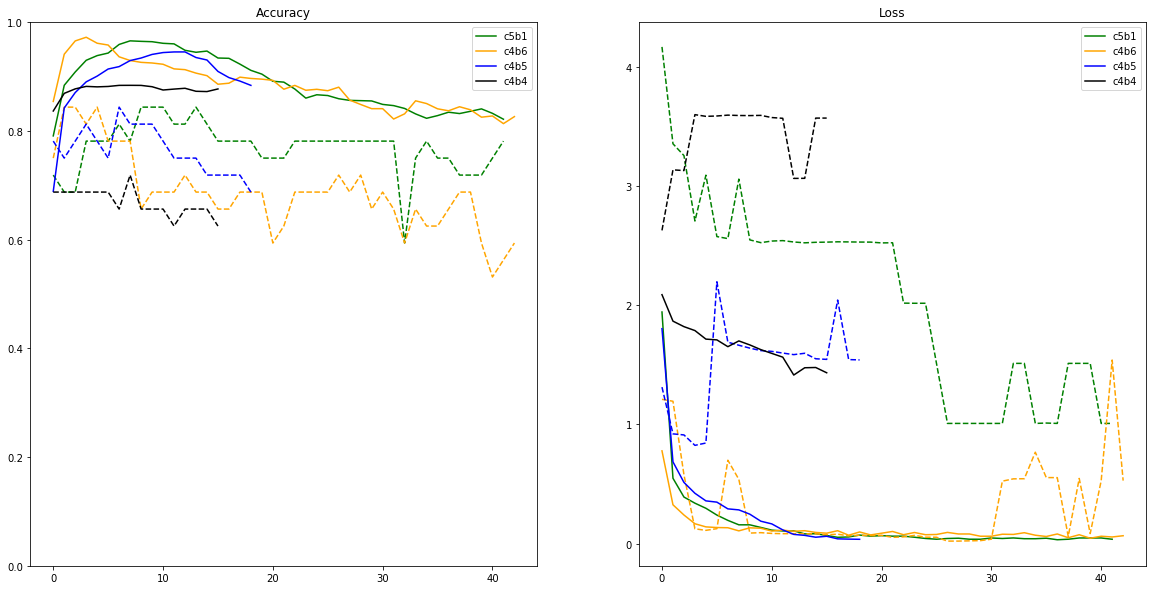

In [6]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c5b1', 'c4b6', 'c4b5', 'c4b4']
plot(info_c5b3, runs_to_plot, colors, max_epoch=None)

# Compare Adamax and Adam

In [31]:
runs_output_c5b2 = {
    'admax_ev20': 'micro_resnet_oc5b2_c5b1_20200120_203957',
    'admax_ev10': 'micro_resnet_oc5b2_c5b1_20200120_205827',
    'adam_ev5': 'micro_resnet_c5b2_c5b1_20200120_210427'
}

info_c5b2 = get_runs_data(ARTIFACTS_PATH, runs_output_c5b2)

admax_ev20
admax_ev10
adam_ev5


Adamax had a strange effect on accuracy: Accuracy drops and loss also goes down.

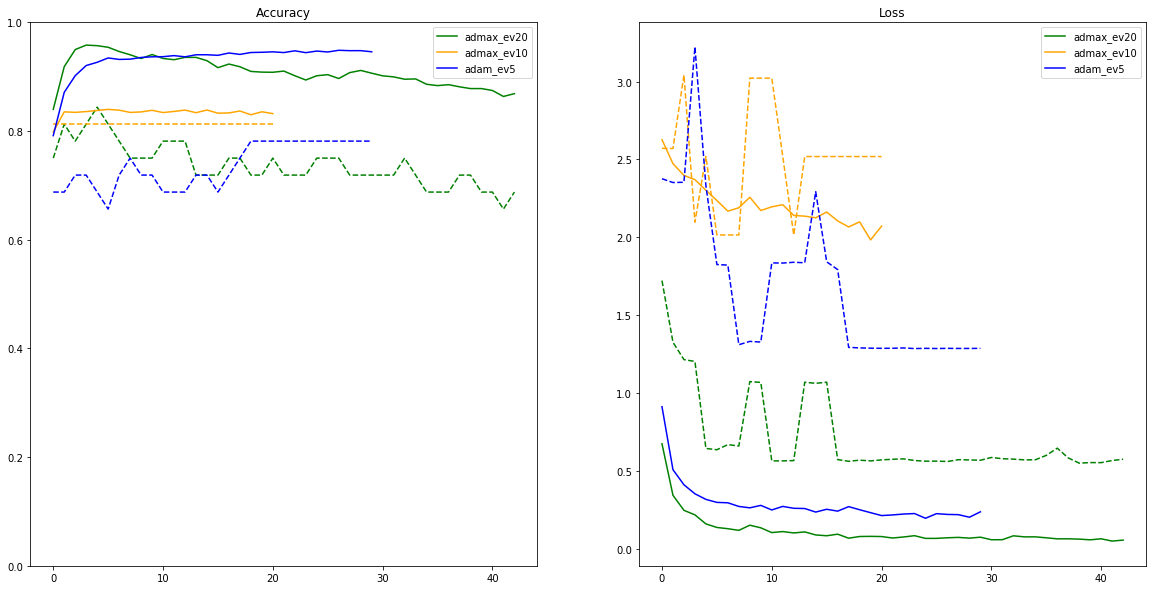

In [32]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['admax_ev20', 'admax_ev10', 'adam_ev5']
plot(info_c5b2, runs_to_plot, colors, max_epoch=None)

# Output: Conv5_Block2

In [54]:
runs_output_c5b2 = {
    'c5b2': 'micro_resnet_c5b2_c5b2_20200120_220433',
    'c5b1': 'micro_resnet_c5b2_c5b1_20200120_210427',
    'c4b6': 'micro_resnet_oc5b2_c4b6_20200120_220535',
    'c4b5': 'micro_resnet_oc5b2_c4b5_20200120_220725',
    'c4b4': 'micro_resnet_c5b2_c4b4_20200120_233907',
    'c4b3': 'micro_resnet_oc5b2_c4b3_20200120_231944',
    'c4b2': 'micro_resnet_c5b2_c4b2_20200120_231253',
    'c4b1': 'micro_resnet_c5b2_c4b1_20200120_231858'
}

info_c5b2 = get_runs_data(ARTIFACTS_PATH, runs_output_c5b2)

c5b2
c5b1
c4b6
c4b5
c4b4
c4b3
c4b2
c4b1


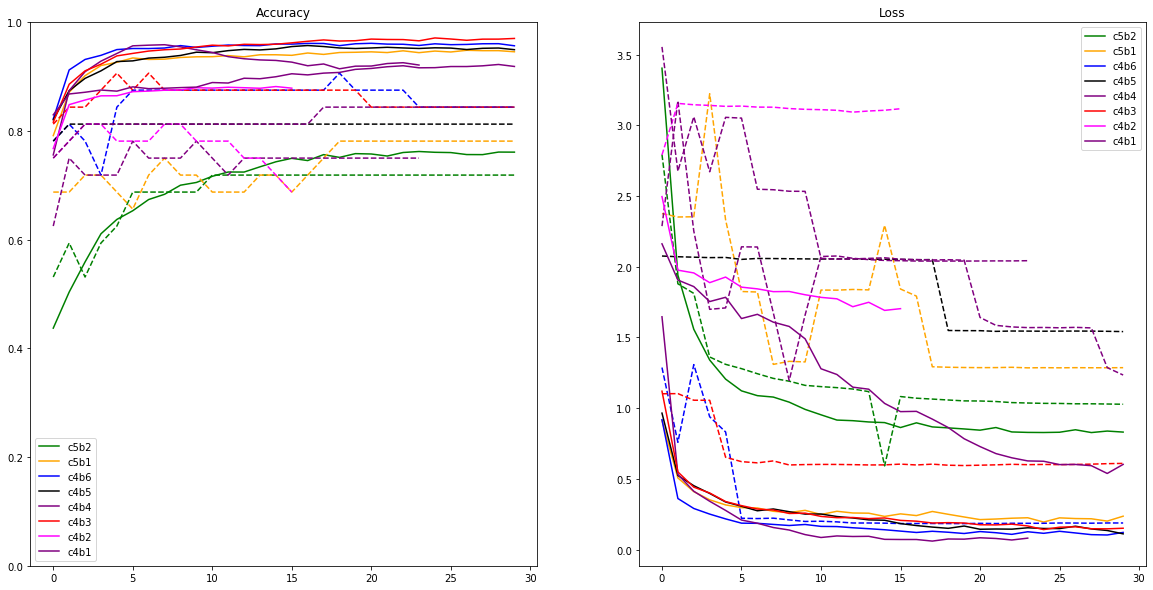

In [55]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c5b2', 'c5b1', 'c4b6', 'c4b5', 'c4b4', 'c4b3', 'c4b2', 'c4b1']
plot(info_c5b2, runs_to_plot, colors, max_epoch=None)

# Output: Conv5_Block3

In [5]:
runs_output_c5b3 = {
    'c5b3': 'micro_resnet_c5b3_c5b3_20200120_003224',
    'c5b1': 'micro_resnet_c5b3_c5b1_20200120_003427',
    'c4b1': 'micro_resnet_c5b3_c4b1_20200120_002510',
    'c3b1': 'micro_resnet_c5b3_c3b1_20200120_002436',
    'c2b1': 'micro_resnet_c5b3_c2b1_20200120_002409'
}

info_c5b3 = get_runs_data(ARTIFACTS_PATH, runs_output_c5b3)

c5b3
c5b1
c4b1
c3b1
c2b1


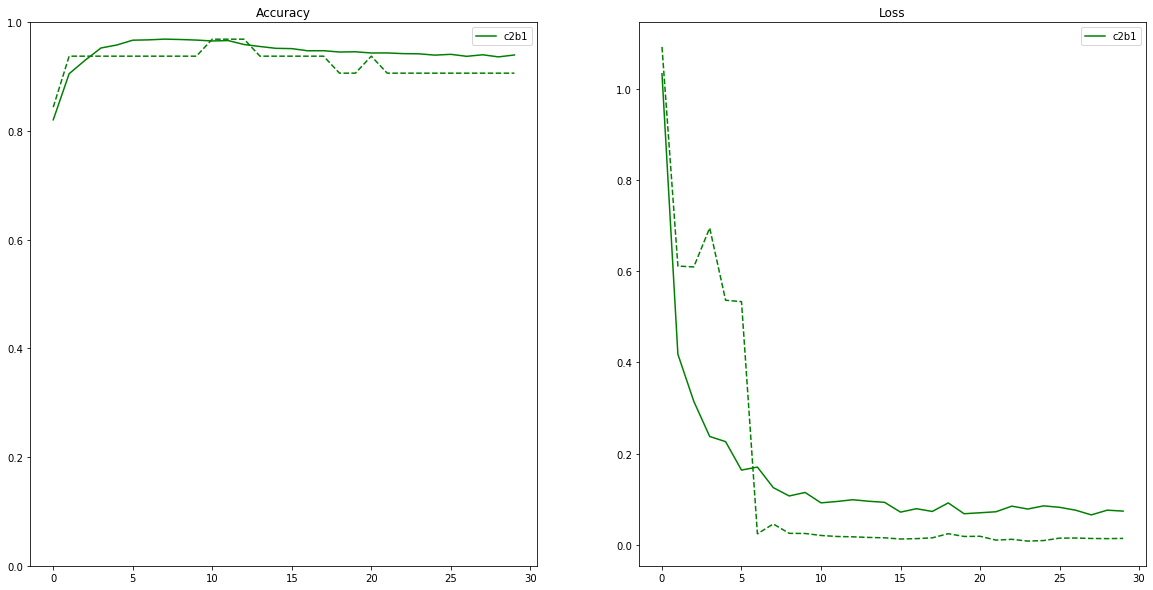

In [12]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c2b1']
plot(info_c5b3, runs_to_plot, colors, max_epoch=None)

# Output: Conv5_Block1

In [18]:
runs_output_c5b1 = {
    'c5b1': 'micro_resnet_c5b1_c5b1_20200120_033904',
    'c4b1': 'micro_resnet_c5b1_c4b1_20200120_034044',
    'c3b2': 'micro_resnet_c5b1_c3b2_20200120_034204',  
}

runs_output_c5b1 = get_runs_data(ARTIFACTS_PATH, runs_output_c5b1)

c5b1
c4b1
c3b2


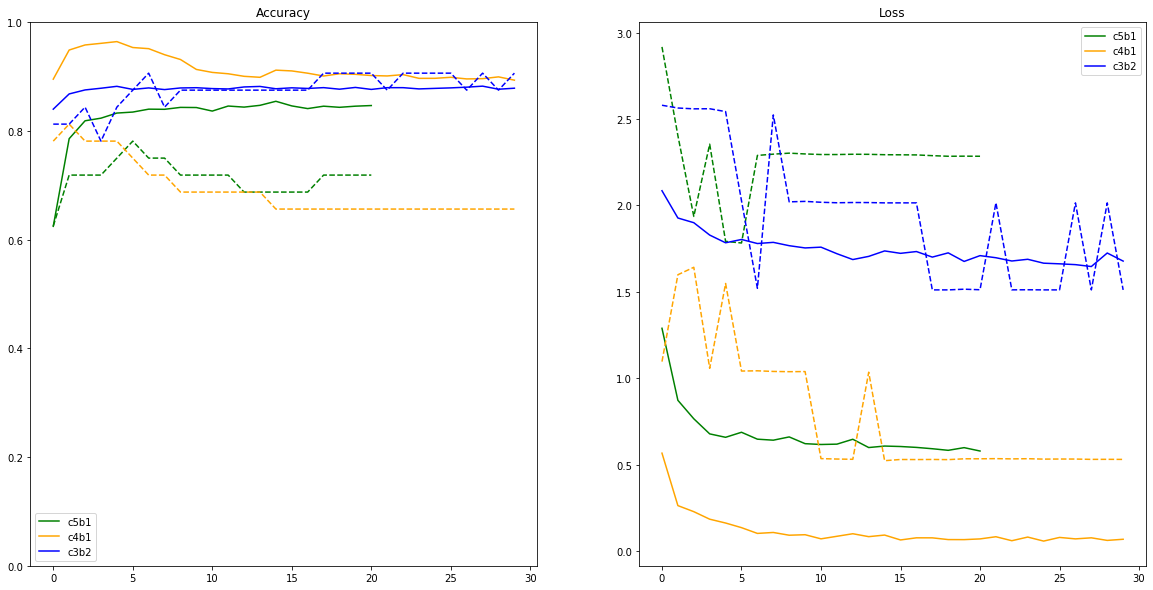

In [19]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c5b1', 'c4b1', 'c3b2']
plot(runs_output_c5b1, runs_to_plot, colors, max_epoch=None)

# Output: Conv4_Block6

In [13]:
runs_output_c4b6 = {
    'c4b6': 'micro_resnet_c4b6_c4b6_20200120_160722',
    'c4b1': 'micro_resnet_c4b6_c4b1_20200120_160819',
    'c3b2': 'micro_resnet_c4b6_c3b2_20200120_160933',
    'c2b2': 'micro_resnet_c4b6_c2b2_20200120_161034'    
}

runs_output_c4b6 = get_runs_data(ARTIFACTS_PATH, runs_output_c4b6)

c4b6
c4b1
c3b2
c2b2


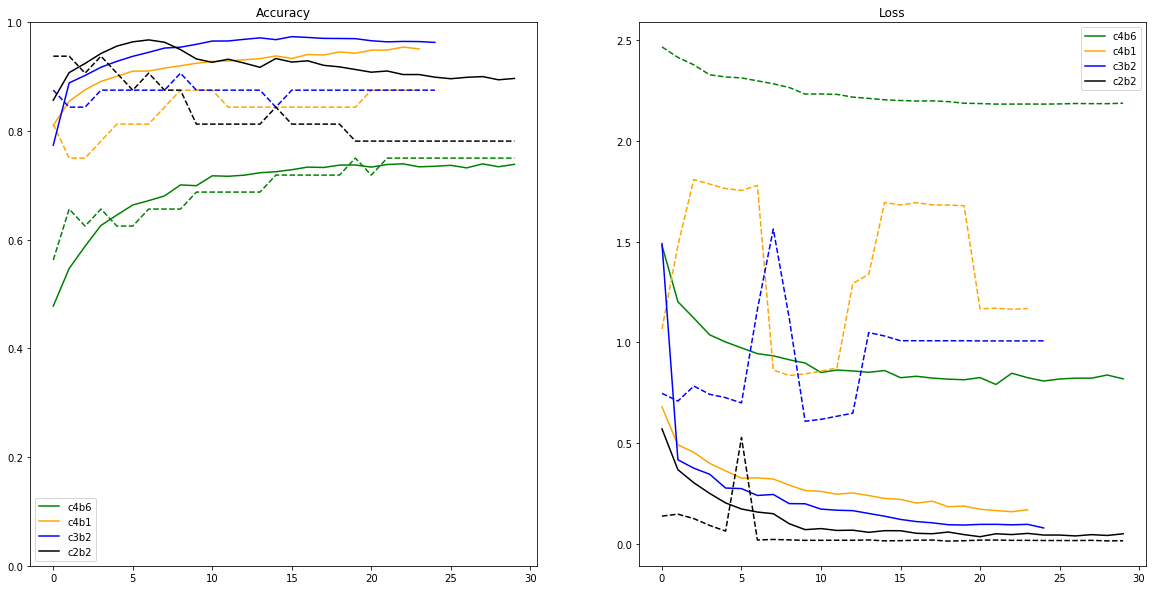

In [15]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c4b6', 'c4b1', 'c3b2', 'c2b2']
plot(runs_output_c4b6, runs_to_plot, colors, max_epoch=None)

# Output: Conv4_Block1

In [16]:
runs_output_c4b1 = {
    'c4b1': 'micro_resnet_c4b1_c4b1_20200120_050714',
    'c3b2': 'micro_resnet_c4b1_c3b2_20200120_050843',
    'c2b2': 'micro_resnet_c4b1_c2b2_20200120_050947',    
}

runs_output_c4b1 = get_runs_data(ARTIFACTS_PATH, runs_output_c4b1)

c4b1
c3b2
c2b2


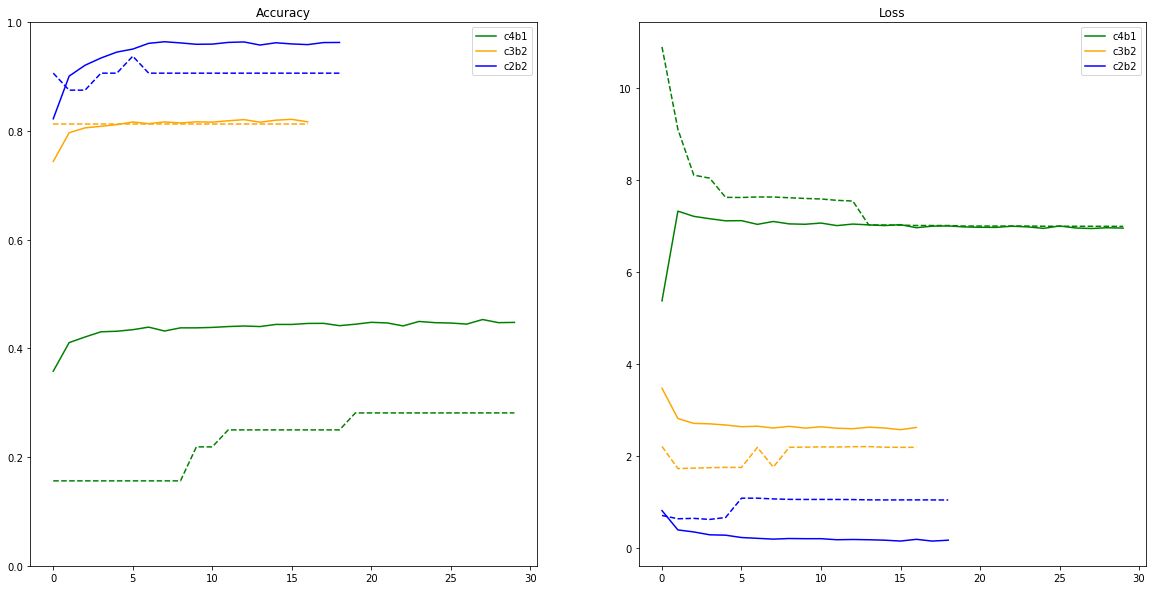

In [17]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c4b1', 'c3b2', 'c2b2']
plot(runs_output_c4b1, runs_to_plot, colors, max_epoch=None)

# Trained whole networks with Adamax

Training hyper-parameters:
* Learning rate of 4e-4 with decay of 0.5 every 5 epochs
* Adamax optimizer (suggested by Yu et al.)
* Max 30 epochs

Using Adamax makes the accuracy go down after an initial peak; the weird behavior is that the loss also goes down. Also, we can observe that the validation accuracy is higher than the training accuracy and the the validation loss can be lower than the training loss. This is a more complicated scenario but we can attribute this behavior, partially, to the chosen learning rate for all models.

In [121]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/resnet50/adamax')

runs_output_end = {
    'c5b3': 'c5b3_all',
    'c5b2': 'c5b2_all',
    'c5b1': 'c5b1_all',
    'c4b6': 'c4b6_all',
    'c4b1': 'c4b1_all'
}

runs_output_end = get_runs_data(ARTIFACTS_PATH, runs_output_end)

c5b3
c5b2
c5b1
c4b6
c4b1


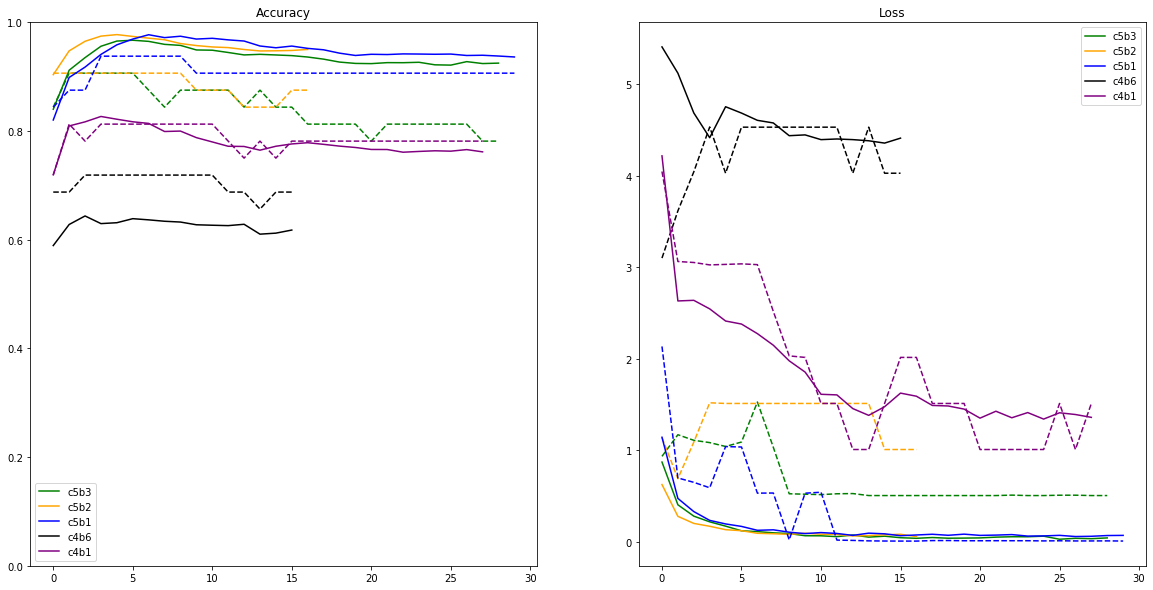

In [122]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c5b3', 'c5b2', 'c5b1', 'c4b6', 'c4b1']
plot(runs_output_end, runs_to_plot, colors, max_epoch=None)

# Trained whole networks with Adam

In [60]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/resnet50')

In [65]:
runs_output_end_adam = {
    'c5b3': 'c5b3_all',
    'c5b2': 'c5b2_all',
    'c5b1': 'c5b1_all',
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)

c5b3
c5b2
c5b1


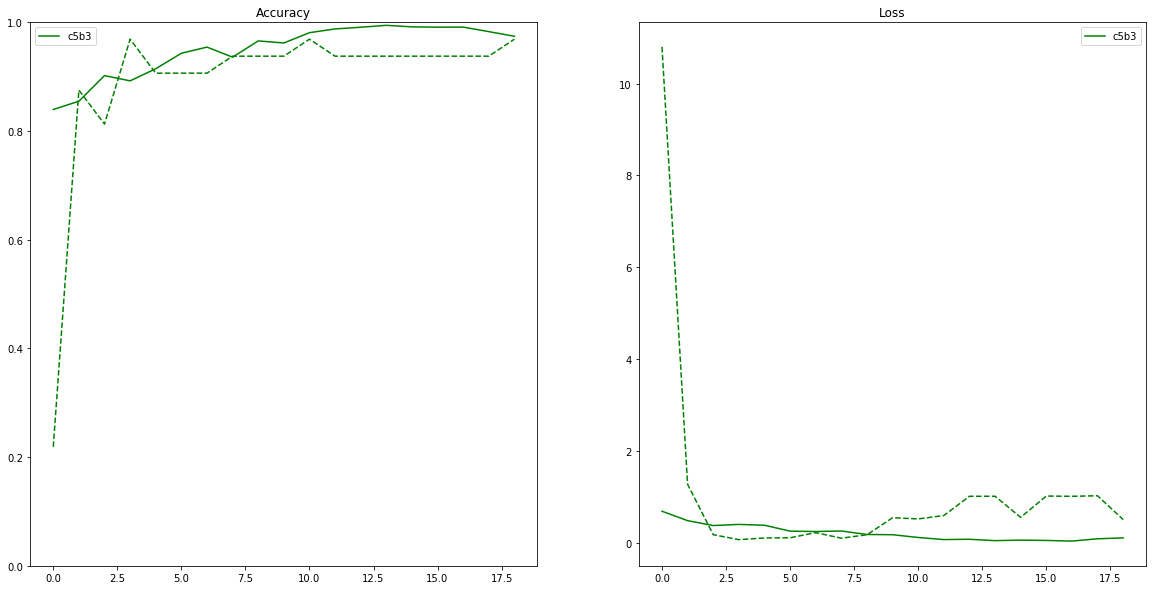

In [67]:
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c5b3']
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

c4b6
c4b5
c4b4
c4b3
c4b2
c4b1


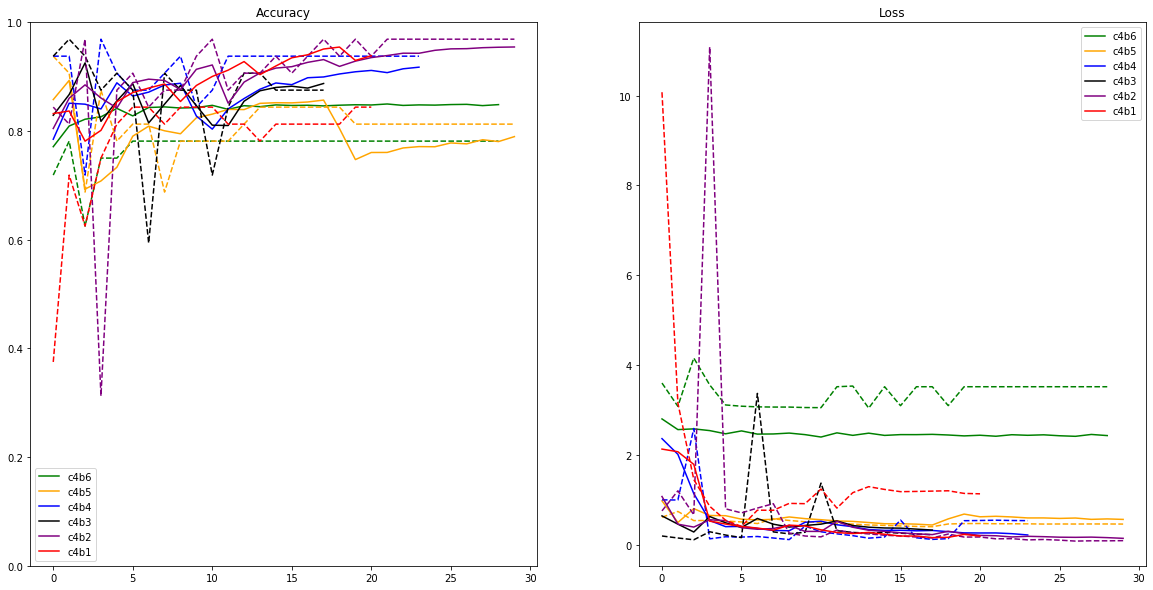

In [56]:
runs_output_end_adam = {
    'c4b6': 'micro_resnet_c4b6_all_20200120_212519',
    'c4b5': 'micro_resnet_c4b5_all_20200120_231450',
    'c4b4': 'micro_resnet_c4b4_all_20200120_231525',
    'c4b3': 'micro_resnet_c4b3_all_20200120_231559',
    'c4b2': 'micro_resnet_c4b2_all_20200120_013428',
    'c4b1': 'micro_resnet_c4b1_all_20200120_212409',
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)

colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c4b6', 'c4b5', 'c4b4', 'c4b3', 'c4b2', 'c4b1']
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

# Compare learning rates

In [84]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/')

1e3
1e4
1e5
1e6
1e5decay
5e5decay
5e6


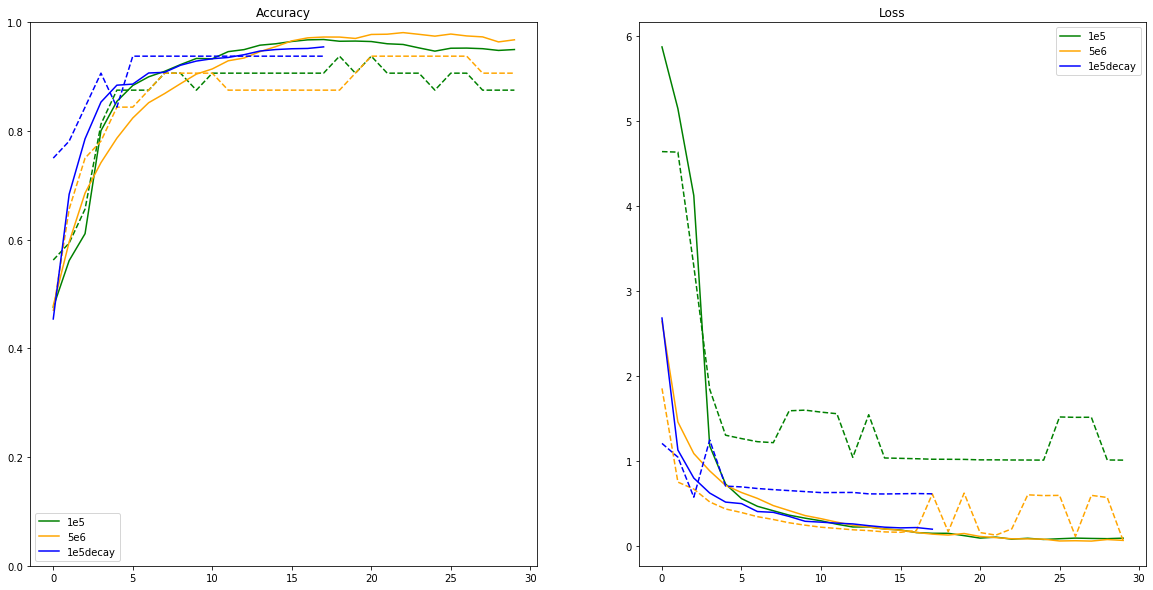

In [113]:
runs_output_end_adam = {
    '1e3': 'micro_resnet_c5b3_all_1e3_20200120_235408',
    '1e4': 'micro_resnet_c5b3_all_1e4_20200120_235511',
    '1e5': 'micro_resnet_c5b3_all_1e5_20200120_235632', #83.84
    '1e6': 'micro_resnet_c5b3_all_1e6_20200120_000234',
    '1e5decay': 'micro_resnet_c5b3_all_1e5_decay_20200120_010558', #82.13 
    '5e5decay': 'micro_resnet_c5b3_all_5e5_decay_20200120_010832',
    '5e6': 'micro_resnet_c5b3_all_5e6_20200120_012847' #83.39
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)

colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['1e5', '5e6', '1e5decay']
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

1e-5 seems to be a good learning rate for the full model; however, for smaller versions, we see the weird behavior again. Check for example c5b2 and c5b1

c5b2
c5b1
c4b5
c4b4


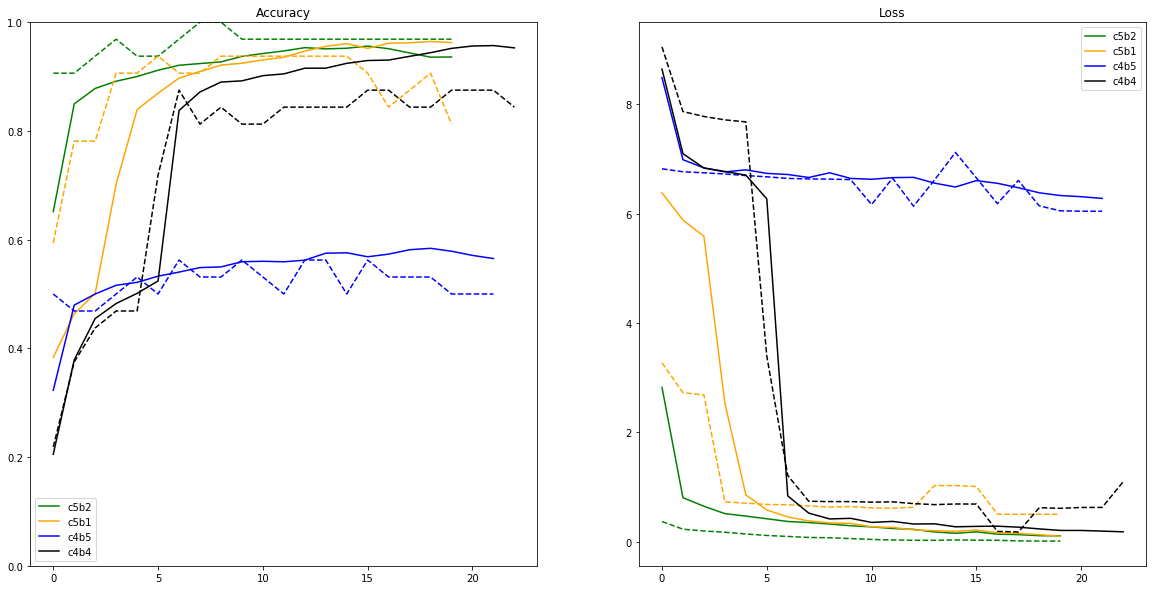

In [117]:
runs_output_end_adam = {
    'c5b2': 'micro_resnet_c5b2_all_1e5_20200120_030811',
    'c5b1': 'micro_resnet_c5b1_all_1e5_20200120_030904',
    'c4b5': 'micro_resnet_c4b5_all_1e5_20200120_030940', 
    'c4b4': 'micro_resnet_c4b4_all_1e5_20200120_031025',
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)

colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c5b2', 'c5b1', 'c4b5', 'c4b4']
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

running three experiments with a split of 20 percent
Now, let's change the preprocessing function

c5b3
c5b2
c5b1
c4b6
c4b5
c4b4
c4b3
c4b2
c4b1
c3b4
c3b3
c5b3p


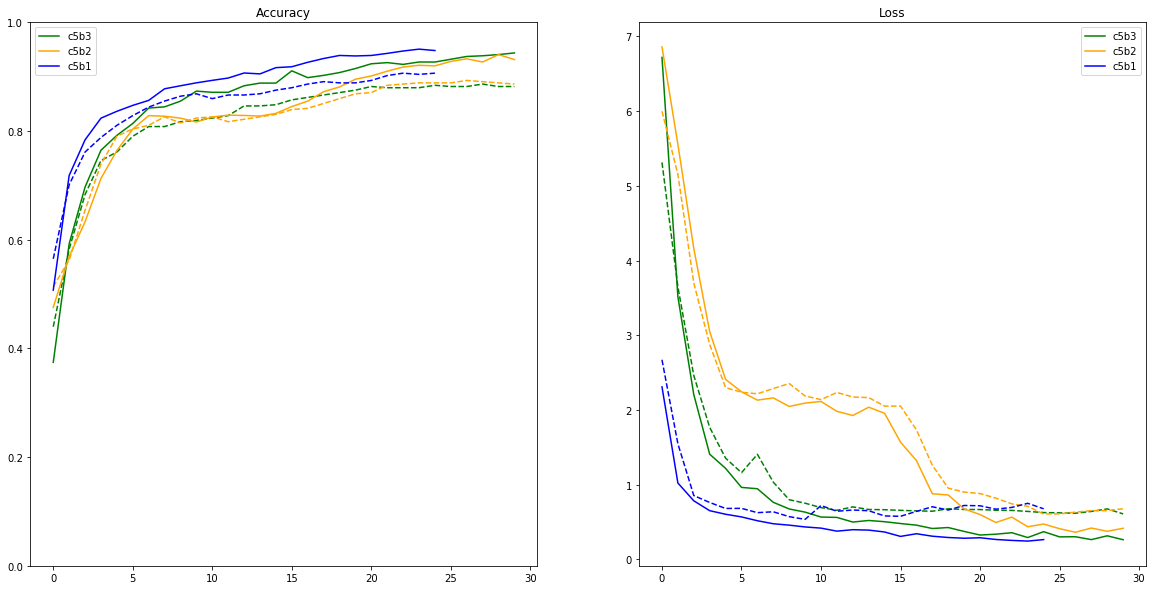

In [142]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/')
runs_output_end_adam = {
    'c5b3': 'micro_resnet_c5b3_all_1e5_split20_20200120_164314', #83.96 23.6M
    'c5b2': 'micro_resnet_c5b2_all_1e5_split20_20200120_164438', #84.19 19.1M
    'c5b1': 'micro_resnet_c5b1_all_1e5_split20_20200120_164550', #84.54 14.6M
    'c4b6': 'micro_resnet_c4b6_all_1e5_split20_20200120_171614', #85.80 8.6M
    'c4b5': 'micro_resnet_c4b5_all_1e5_split20_20200120_171709', #86.48 7.5M
    'c4b4': 'micro_resnet_c4b4_all_1e5_split20_20200120_171805', #82.25 6.4M
    'c4b3': 'micro_resnet_c4b3_all_1e5_split20_20200120_171922', #87.74 5.2M
    'c4b2': 'micro_resnet_c4b2_all_1e5_split20_20200120_180144', #46.05 4.0M
    'c4b1': 'micro_resnet_c4b1_all_1e5_split20_20200120_180247',
    'c3b4': 'micro_resnet_c3b4_all_1e5_split20_20200120_180340',
    'c3b3': 'micro_resnet_c3b3_all_1e5_split20_20200120_180431',
    'c5b3p': 'micro_resnet_c5b3_all_split20_pre_20200120_191009' #82.82
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)
# 'c5b3', 'c5b2', 'c5b1', 
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
# runs_to_plot = ['c5b3', 'c5b3p', 'c5b2', 'c5b1','c4b6', 'c4b5', 'c4b4', 'c4b3']
runs_to_plot = ['c5b3', 'c5b2', 'c5b1']
#runs_to_plot = ['c4b2', 'c4b1', 'c3b4','c3b3']
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

c5b3
c5b2
c5b1
c4b6
c4b5
c4b4
c4b3
c4b2
c4b1
c3b4
c3b3
c5b3p


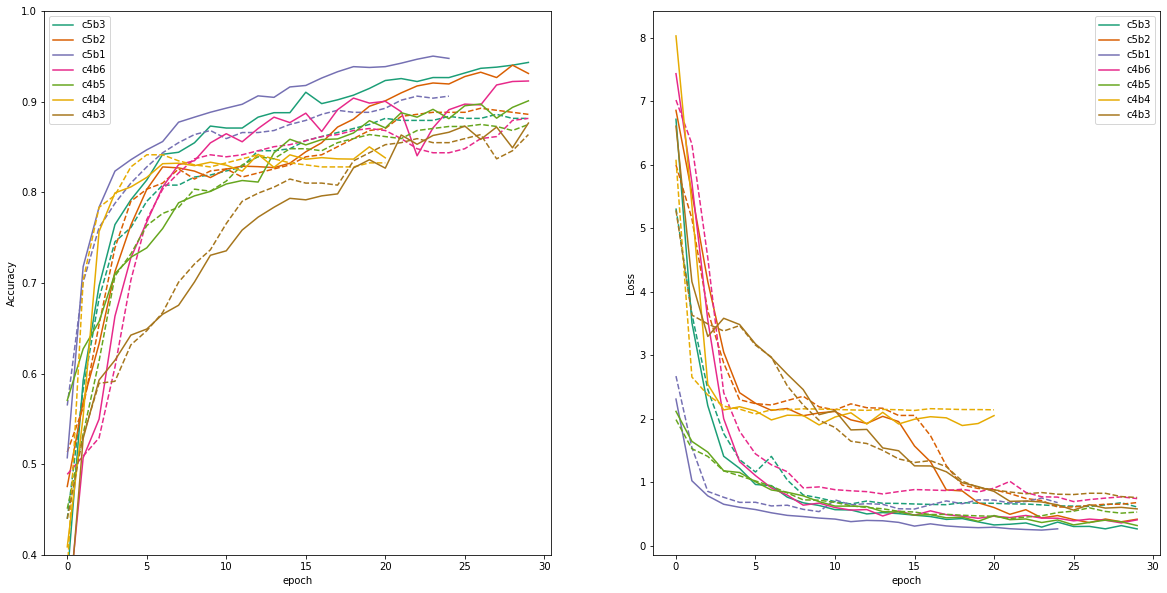

In [190]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/')
runs_output_end_adam = {
    'c5b3': 'micro_resnet_c5b3_all_1e5_split20_20200120_164314', #83.96 23.6M
    'c5b2': 'micro_resnet_c5b2_all_1e5_split20_20200120_164438', #84.19 19.1M
    'c5b1': 'micro_resnet_c5b1_all_1e5_split20_20200120_164550', #84.54 14.6M
    'c4b6': 'micro_resnet_c4b6_all_1e5_split20_20200120_171614', #85.80 8.6M
    'c4b5': 'micro_resnet_c4b5_all_1e5_split20_20200120_171709', #86.48 7.5M
    'c4b4': 'micro_resnet_c4b4_all_1e5_split20_20200120_171805', #82.25 6.4M
    'c4b3': 'micro_resnet_c4b3_all_1e5_split20_20200120_171922', #87.74 5.2M
    'c4b2': 'micro_resnet_c4b2_all_1e5_split20_20200120_180144', #46.05 4.0M
    'c4b1': 'micro_resnet_c4b1_all_1e5_split20_20200120_180247',
    'c3b4': 'micro_resnet_c3b4_all_1e5_split20_20200120_180340',
    'c3b3': 'micro_resnet_c3b3_all_1e5_split20_20200120_180431',
    'c5b3p': 'micro_resnet_c5b3_all_split20_pre_20200120_191009' #82.82
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)
# 'c5b3', 'c5b2', 'c5b1', 
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', 'purple']
runs_to_plot = ['c5b3', 'c5b2', 'c5b1', 'c4b6', 'c4b5', 'c4b4', 'c4b3']
# 'c4b6', 'c4b5', 'c4b4', 'c4b3'
#runs_to_plot = ['c4b2', 'c4b1', 'c3b4','c3b3']
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

c5b3
c5b3_128
c5b3_128_2


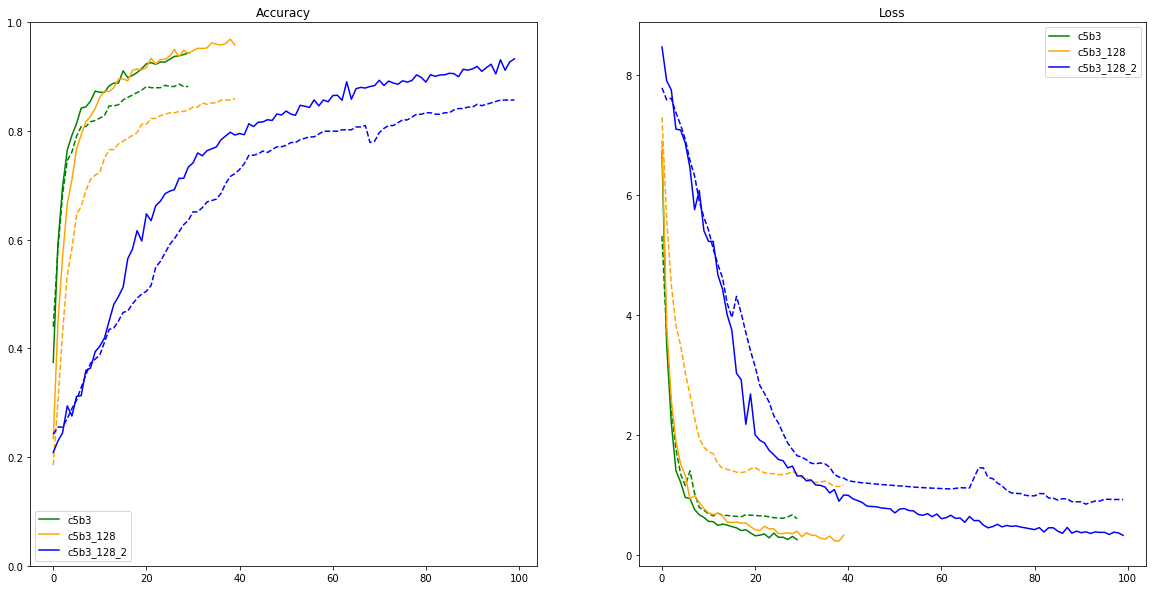

In [153]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/')
runs_output_end_adam = {
    'c5b3': 'micro_resnet_c5b3_all_1e5_split20_20200120_164314', #83.96 23.6M
    'c5b3_128': 'batch128_20200120_184340', #84.19 19.1M,
    'c5b3_128_2': 'batch128_20200120_190017'
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)
# 'c5b3', 'c5b2', 'c5b1', 
colors = ['green', 'orange', 'blue', 'black', 'purple', 'red', 'magenta', 'purple']
runs_to_plot = ['c5b3', 'c5b3_128', 'c5b3_128_2']
# 'c4b6', 'c4b5', 'c4b4', 'c4b3'
#runs_to_plot = ['c4b2', 'c4b1', 'c3b4','c3b3']
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

latest batches

c5b3_all
c5b3_c5b3
c5b3_c5b2
c5b3_c5b1
c5b3_c4b6
c5b3_c4b5
c5b3_c4b1


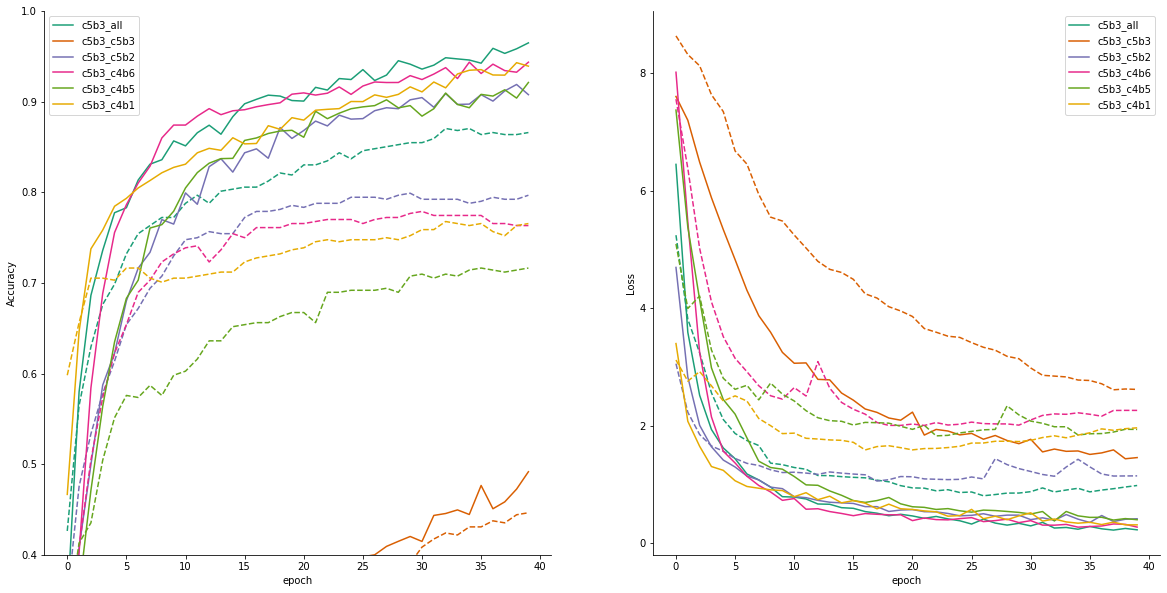

In [222]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/')
runs_output_end_adam = {
    'c5b3_all':  'batch_c5b3_all_20_20200120_192644', 
    'c5b3_c5b3': 'batch_c5b3_c5b3_20_20200120_195129', 
    'c5b3_c5b2': 'batch_c5b3_c5b2_20_20200120_201035',
    'c5b3_c5b1': 'batch_c5b3_c5b1_20_20200120_203012',
    'c5b3_c4b6': 'batch_c5b3_c4b6_20_20200120_205132',
    'c5b3_c4b5': 'batch_c5b3_c4b5_20_20200120_211301',
    'c5b3_c4b1': 'batch_c5b3_c4b1_20_20200120_224149'
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', 'purple']
runs_to_plot = ['c5b3_all', 'c5b3_c5b3', 'c5b3_c5b2', 'c5b3_c4b6', 'c5b3_c4b5', 'c5b3_c4b1']
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

c5b3_all
c5b2_all
c5b1_all
c4b6_all
c4b5_all
c4b4_all
c4b3_all
c4b2_all
c4b1_all
c3b4_all
c2b2_all


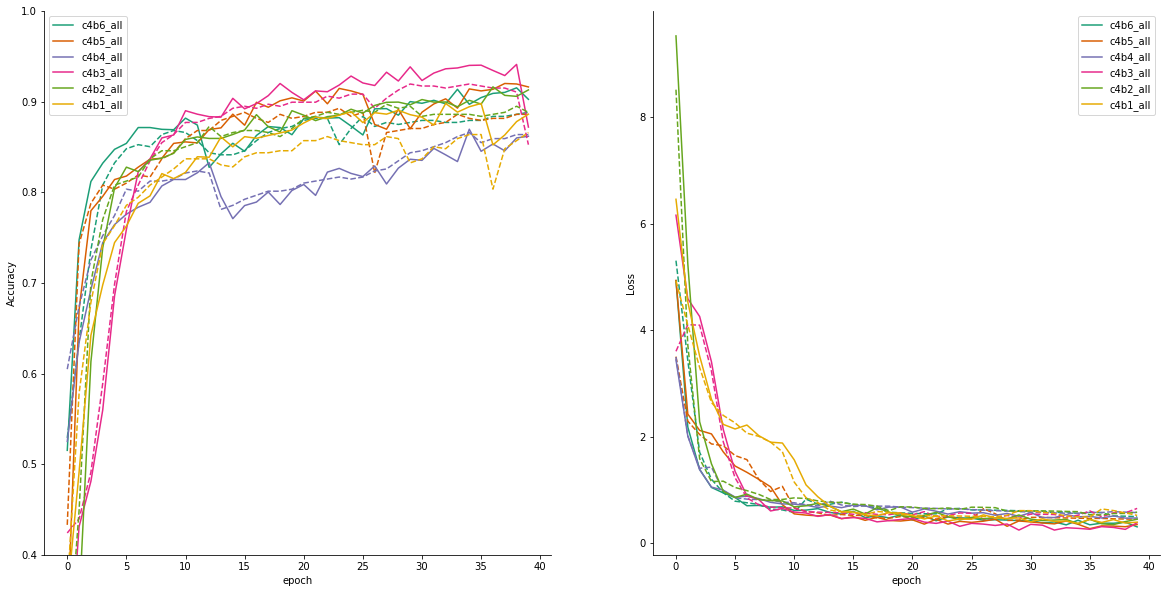

In [210]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/')
runs_output_end_adam = {
    'c5b3_all': 'batch_c5b3_all_20_20200120_192644',
    'c5b2_all': 'batch_c5b2_all_20_20200120_230442',
    'c5b1_all': 'batch_c5b1_all_20_20200120_021533',
    'c4b6_all': 'batch_c4b6_all_20_20200120_194715',
    'c4b5_all': 'batch_c4b5_all_20_20200120_230313',
    'c4b4_all': 'batch_c4b4_all_20_20200120_020314',
    'c4b3_all': 'batch_c4b3_all_20_20200120_044342',
    'c4b2_all': 'batch_c4b2_all_20_20200120_065900',
    'c4b1_all': 'batch_c4b1_all_20_20200120_085151',
    'c3b4_all': 'batch_c3b4_all_20_20200120_194932',
    'c2b2_all': 'batch_c2b2_all_20_20200120_195209', 
    
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', 'purple']
runs_to_plot = ['c4b6_all', 'c4b5_all', 'c4b4_all', 'c4b3_all', 'c4b2_all', 'c4b1_all']
#'c5b3_all', 'c5b2_all', 'c5b1_all',
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

c5b3_all
c5b2_all
c5b1_all
c4b6_all
c4b5_all
c4b4_all
c4b3_all
c4b2_all
c4b1_all
c3b4_all
c3b3_all
c3b2_all
c3b1_all
c2b2_all
c2b1_all
cnn6_adam
cnn6_adamax


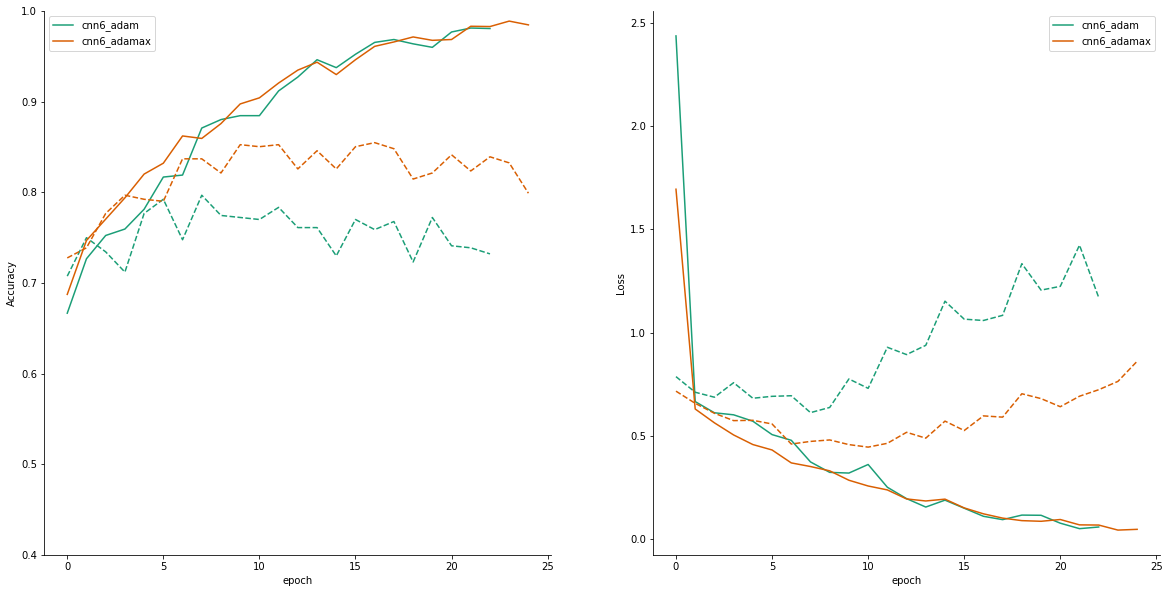

In [229]:
ARTIFACTS_PATH = Path('/home/jtrell2/data/clef/artifacts/')
runs_output_end_adam = {
    'c5b3_all': 'batch_c5b3_all_20_20200120_192644',
    'c5b2_all': 'batch_c5b2_all_20_20200120_230442',
    'c5b1_all': 'batch_c5b1_all_20_20200120_021533',
    'c4b6_all': 'batch_c4b6_all_20_20200120_194715',
    'c4b5_all': 'batch_c4b5_all_20_20200120_230313',
    'c4b4_all': 'batch_c4b4_all_20_20200120_020314',
    'c4b3_all': 'batch_c4b3_all_20_20200120_044342',
    'c4b2_all': 'batch_c4b2_all_20_20200120_154645',
    'c4b1_all': 'batch_c4b1_all_20_20200120_085151',
    'c3b4_all': 'batch_c3b4_all_20_20200120_194932',
    'c3b3_all': 'batch_c3b3_all_20_20200120_212049',
    'c3b2_all': 'batch_c3b2_all_20_20200120_162159',
    'c3b1_all': 'batch_c3b1_all_20_20200120_232916',
    'c2b2_all': 'batch_c2b2_all_20_20200120_165144', 
    'c2b1_all': 'batch_c2b1_all_20_20200120_201245',
    'cnn6_adam': 'cnn6_micro_adam',
    'cnn6_adamax': 'cnn6_micro_adamax_20200120_170244'
}

runs_output_end_adam = get_runs_data(ARTIFACTS_PATH, runs_output_end_adam)
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', 'purple']
# runs_to_plot = ['c5b3_all', 'c5b2_all', 'c5b1_all']
runs_to_plot = ['c3b4_all', 'c3b3_all', 'c3b2_all', 'c3b1_all']
runs_to_plot = ['c4b6_all', 'c4b5_all', 'c4b4_all', 'c4b3_all', 'c4b2_all', 'c4b1_all']
runs_to_plot = ['c5b3_all', 'c4b6_all', 'c4b5_all', 'c4b3_all', 'c3b3_all']
runs_to_plot = ['cnn6_adam', 'cnn6_adamax']
#',
plot(runs_output_end_adam, runs_to_plot, colors, max_epoch=None)

In [233]:
from tensorflow.keras.models import load_model

In [239]:
best = load_model('/home/jtrell2/data/clef/artifacts/batch_c5b3_all_20_20200120_192644/last.hdf5')

In [253]:
o = best.get_layer('conv2_block2_out').output

In [254]:
o.shape

TensorShape([None, 56, 56, 256])

In [256]:
56*56*256

802816